<a href="https://colab.research.google.com/github/hariskhan-hk/Churn_pred/blob/main/knnclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
#import platform
import pandas as pd
import sklearn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

%matplotlib inline

In [143]:
tel_df_copy = pd.read_csv('/content/sample_data/Cleaned_Telecom_Dataset.csv', index_col=0)
tel_df_copy.shape

(7032, 51)

In [144]:
tel_df_copy.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


In [145]:
tel_df_copy.tail()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
7038,0,84.80,1990.50,0,False,True,False,True,False,True,...,False,False,False,True,False,True,False,False,False,False
7039,0,103.20,7362.90,0,True,False,False,True,False,True,...,False,True,False,False,False,False,False,False,False,True
7040,0,29.60,346.45,0,True,False,False,True,False,True,...,False,False,True,False,True,False,False,False,False,False
7041,1,74.40,306.60,1,False,True,False,True,True,False,...,False,False,False,True,True,False,False,False,False,False
7042,0,105.65,6844.50,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,False,False,True


In [146]:
tel_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7032 non-null   int64  
 4   gender_Female                            7032 non-null   bool   
 5   gender_Male                              7032 non-null   bool   
 6   Partner_No                               7032 non-null   bool   
 7   Partner_Yes                              7032 non-null   bool   
 8   Dependents_No                            7032 non-null   bool   
 9   Dependents_Yes                           7032 non-null   bool   
 10  PhoneService_No                          7032 non-nul

Feature selection

In [147]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(tel_df_copy.drop(['Churn'],axis = 1))
scaled_features = scaler.transform(tel_df_copy.drop('Churn',axis = 1))

In [148]:
X = scaled_features
Y = tel_df_copy['Churn']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=42)

In [149]:
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=30)

In [150]:
pred_knn = knn.predict(X_test)

**Calculating error**

The error rate is found by comparing `pred_i` (predicted labels) with `Y_test` (actual labels). `pred_i != Y_test` generates a list of True (wrong predictions) and False (correct predictions). `np.mean(pred_i != Y_test)` calculates the percentage of wrong predictions. This error rate is then added to the `error_rate` list.

In [151]:
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

error_rate

[0.27440758293838863,
 0.25260663507109005,
 0.25971563981042656,
 0.24218009478672986,
 0.24786729857819906,
 0.23459715639810427,
 0.23601895734597156,
 0.22511848341232227,
 0.23033175355450236,
 0.22796208530805687,
 0.22796208530805687,
 0.22085308056872038,
 0.22654028436018958,
 0.22037914691943128,
 0.23033175355450236,
 0.21990521327014217,
 0.22322274881516588,
 0.22180094786729856,
 0.22511848341232227,
 0.2156398104265403,
 0.22227488151658767,
 0.21943127962085307,
 0.22322274881516588,
 0.2161137440758294,
 0.2213270142180095,
 0.21658767772511847,
 0.21706161137440758,
 0.21800947867298578,
 0.21753554502369668,
 0.21516587677725119,
 0.21706161137440758,
 0.2109004739336493,
 0.21753554502369668,
 0.21658767772511847,
 0.218957345971564,
 0.21753554502369668,
 0.218957345971564,
 0.2184834123222749,
 0.22274881516587677]

Text(0, 0.5, 'Error Rate')

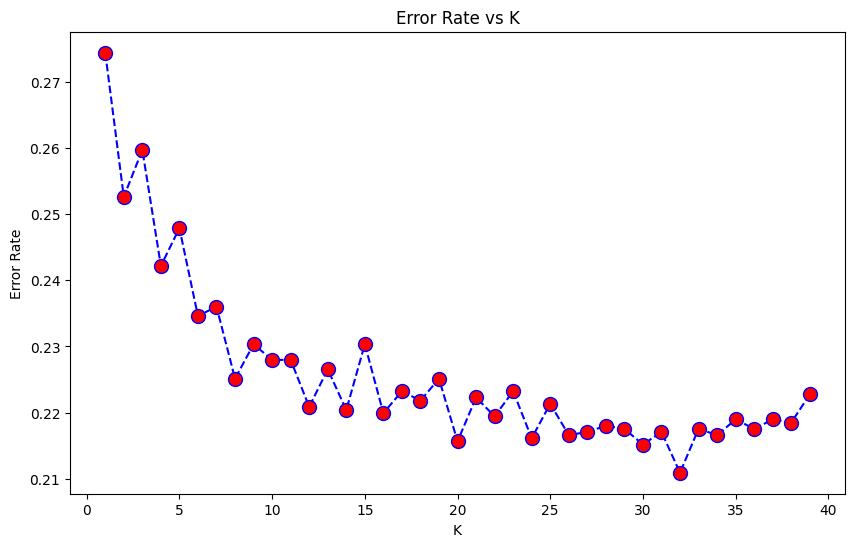

In [152]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

**Optimal Range for k:**
The lowest error rates are observed around
𝑘
=
15
−
20
k=15−20. This range seems to be the optimal choice for the number of neighbors in this specific dataset, as it minimizes the error rate.

In [153]:
print(classification_report(Y_test, pred_knn))


              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1549
           1       0.60      0.56      0.58       561

    accuracy                           0.78      2110
   macro avg       0.72      0.71      0.72      2110
weighted avg       0.78      0.78      0.78      2110



In [154]:
confusion_matrix_knn = confusion_matrix(Y_test,pred_knn)


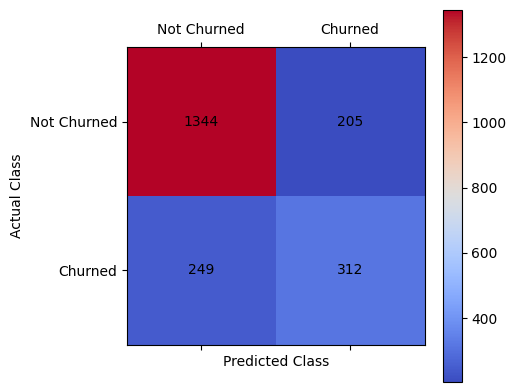

In [163]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_knn,cmap='coolwarm')

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_knn[i, j], ha='center', va='center')

# Add custom labels for x and y ticks
plt.colorbar()
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [166]:
knn_score=knn.score(X_train,Y_train)
accu_score=accuracy_score(Y_test, pred_knn)
print(f"Score: {knn_score}")
print(f"Accuracy score: {accu_score}")

Score: 0.8010971149939049
Accuracy score: 0.7848341232227488


KNN Classification without python package of KNeighborsClassifier

In [158]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# Function to implement KNN classification
def knn_predict(X_train, X_test, Y_train, k):
    y_pred = []
    for test_point in X_test:
        distances = []
        for train_point, label in zip(X_train, Y_train):
            distance = euclidean_distance(test_point, train_point)
            distances.append((distance, label))

        # Sort distances and get k nearest neighbors
        distances = sorted(distances)[:k]
        neighbors = [label for _, label in distances]

        # Predict the class with majority vote
        pred = max(set(neighbors), key=neighbors.count)
        y_pred.append(pred)

    return y_pred

In [ ]:
# Calculate error rate for each k value from 1 to 39
error_rate = []
for k in range(1, 40):
    pred_knn = knn_predict(X_train, X_test, Y_train, k)
    error = np.mean(pred_knn != Y_test)
    error_rate.append(error)

In [159]:
# Predicting with K=30
k = 30
pred_knn = knn_predict(X_train, X_test, Y_train, k)

Accuracy: 0.7848341232227488
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1549
           1       0.60      0.56      0.58       561

    accuracy                           0.78      2110
   macro avg       0.72      0.71      0.72      2110
weighted avg       0.78      0.78      0.78      2110



In [167]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, pred_knn)
print(f"Accuracy: {accuracy}")

# Generate classification report
print(classification_report(Y_test, pred_knn))

Accuracy: 0.7848341232227488
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1549
           1       0.60      0.56      0.58       561

    accuracy                           0.78      2110
   macro avg       0.72      0.71      0.72      2110
weighted avg       0.78      0.78      0.78      2110



<Figure size 800x600 with 0 Axes>

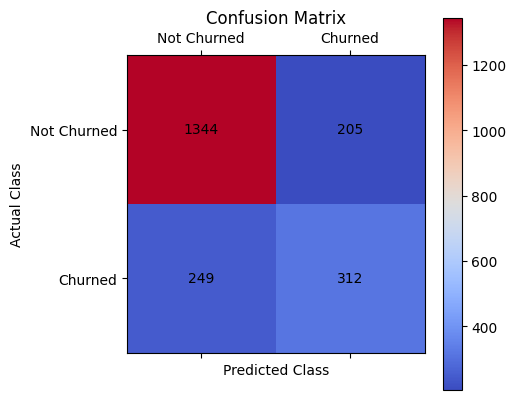

In [160]:
# Generate confusion matrix
confusion_matrix_knn = confusion_matrix(Y_test, pred_knn)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
plt.matshow(confusion_matrix_knn, cmap='coolwarm')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(confusion_matrix_knn[i, j]), ha='center', va='center')

plt.colorbar()
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()